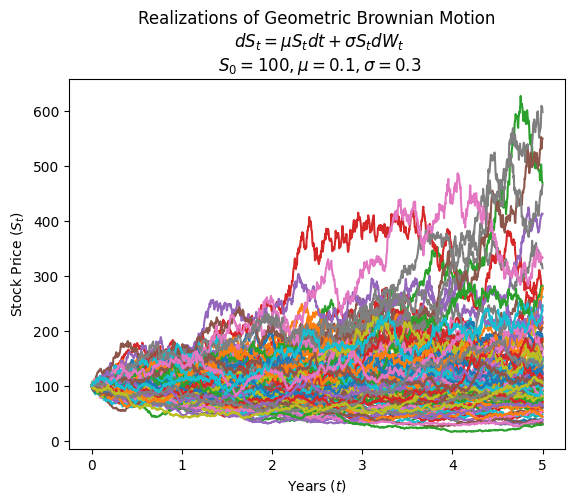

In [119]:
import numpy as np
import pandas as pd
from pykalman import KalmanFilter
import matplotlib.pyplot as plt
from scipy.stats import norm

# http://jonathankinlay.com/2018/09/statistical-arbitrage-using-kalman-filter/

# https://quantpy.com.au/stochastic-calculus/simulating-geometric-brownian-motion-gbm-in-python/

# Parameters
M = 100 # number of sims
T = 5 # time in years
trading_days_per_year = 252
n = T*trading_days_per_year # number of steps in sim
S0 = 100 # initial stock price
mu = 0.1 # annual drift coefficent
sigma = 0.3 # annual volatility
dt = 1/trading_days_per_year # time step

np.random.seed(1000)
# simulation using numpy arrays
St = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)

# include array of 1's
St = np.vstack([np.ones(M), St])

# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0). 
St = S0 * St.cumprod(axis=0)


# Define time interval correctly 
time = np.linspace(0,T,n+1)

# Require numpy array that is the same shape as St
tt = np.full(shape=(M,n+1), fill_value=time).T

plt.plot(tt, St)
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title("Realizations of Geometric Brownian Motion\n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu, sigma))
plt.show()

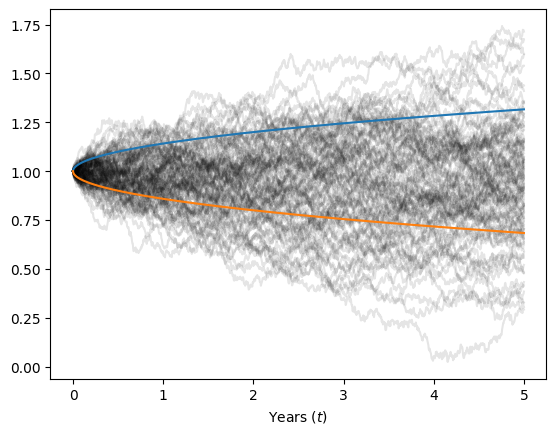

In [120]:
# for random walk variance = T * annual_sigma ** 2
variance = 0.1
annual_sigma = np.sqrt(variance / T)
np.random.seed(1000)
# random.normal takes std and not var

L = 100

# (vol * np.sqrt(dt)) * np.random.randn(n) is the same
beta = np.vstack([np.ones(L), annual_sigma * np.random.normal(0, np.sqrt(dt), size=(L, n)).T])
beta = np.cumsum(beta, axis=0)

beta_std = np.sqrt(np.linspace(0, T, n+1)) * annual_sigma 

tt_beta = np.full(shape=(L,n+1), fill_value=time).T

plt.plot(tt_beta, beta, 'k', alpha=0.1)
plt.plot(time, 1+beta_std)
plt.plot(time, 1-beta_std)
plt.xlabel("Years $(t)$")
plt.show()

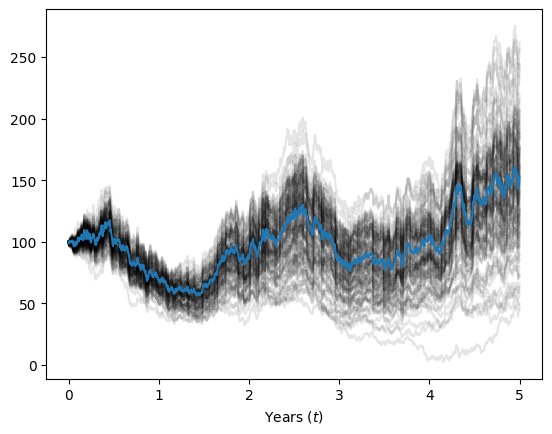

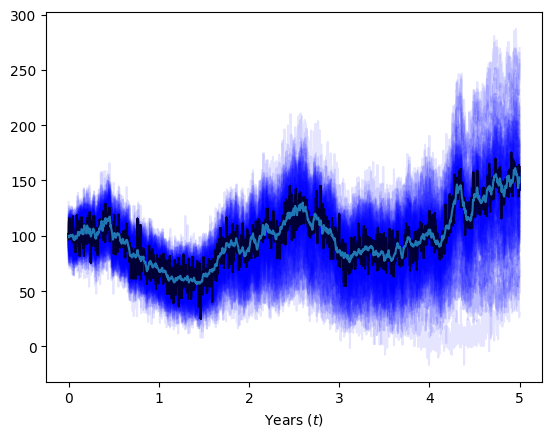

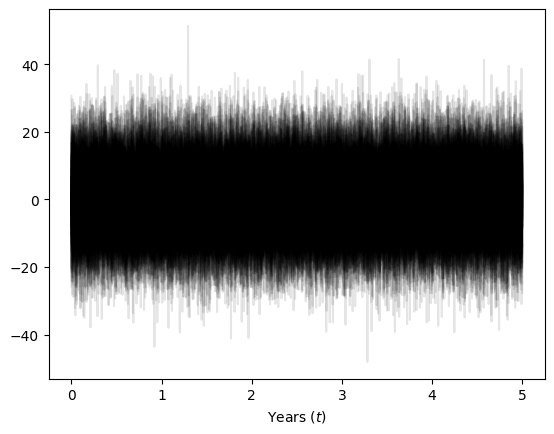

In [143]:
for j in range(M):
  X_true = (beta.T * St[:,j]).T

  noise_var = 100
  noise = np.sqrt(noise_var) * np.random.normal(0, 1, size=X_true.shape)
  X_noise = X_true + noise

  plt.plot(tt_beta, X_true, 'k', alpha=0.1)
  plt.plot(time, St[:,j])
  plt.xlabel("Years $(t)$")
  plt.show()

  plt.plot(tt_beta, X_noise, 'b', alpha=0.1)
  plt.plot(tt_beta, St[:, j]+noise[:,0], 'k', alpha=0.01)
  plt.plot(time, St[:,j])
  plt.xlabel("Years $(t)$")
  plt.show()

  plt.plot(tt_beta, noise, 'k', alpha=0.01)
  plt.xlabel("Years $(t)$")
  plt.show()
  if j == 0:
    break

